## this is data collection and pandas used to analyse data in file

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import math
import sklearn
%matplotlib inline

titdata = pd.read_csv("transport.csv")
titdata.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [31]:
print("number of " ,len(titdata.index))
titdata.info()




number of  891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

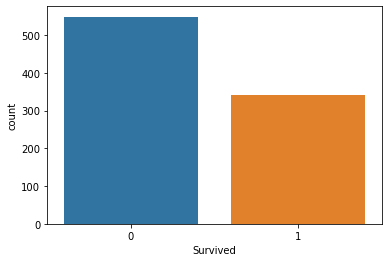

In [32]:
sns.countplot(x="Survived",data = titdata)

<AxesSubplot:xlabel='Survived', ylabel='count'>

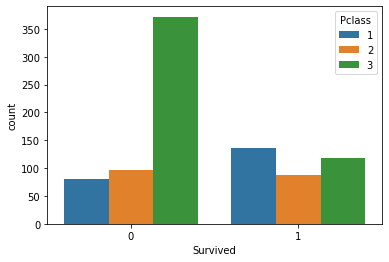

In [33]:
sns.countplot(x="Survived",hue="Pclass",data = titdata)

<AxesSubplot:ylabel='Frequency'>

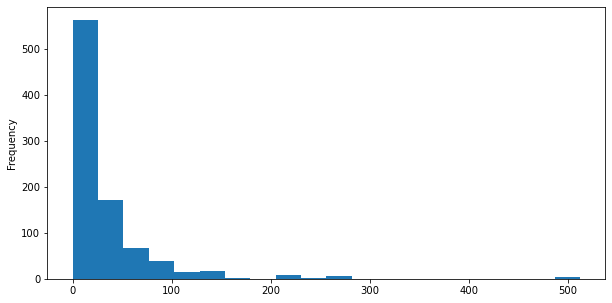

In [34]:
titdata["Fare"].plot.hist(bins=20,figsize=(10,5))


<AxesSubplot:xlabel='SibSp', ylabel='count'>

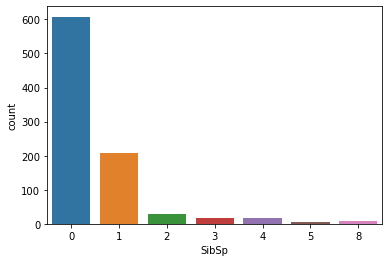

In [35]:
sns.countplot(x="SibSp",data= titdata)

##data wrangling 

In [36]:
titdata.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
titdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

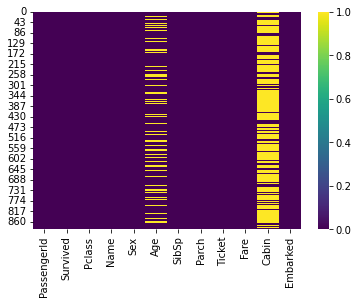

In [38]:
sns.heatmap(titdata.isnull(),cmap = "viridis")

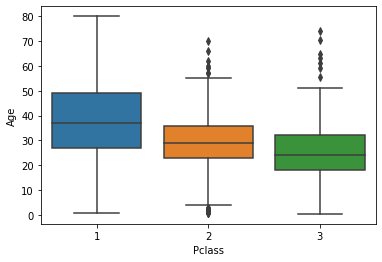

In [39]:
sns.boxplot(x="Pclass",y="Age",data=titdata)
#either drop the column or rfill with random data 
titdata.drop("Cabin",axis =1,inplace = True)

In [40]:
titdata.dropna(inplace=True)

<AxesSubplot:>

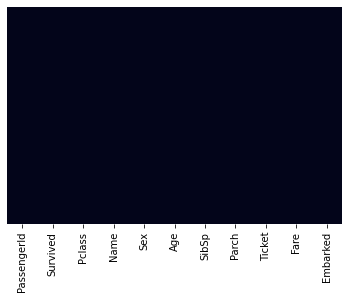

In [41]:
sns.heatmap(titdata.isnull(),yticklabels = False,cbar = False)

In [42]:
sex=pd.get_dummies(titdata['Sex'],drop_first = True)
sex.head(5)
embark = pd.get_dummies(titdata['Embarked'],drop_first=True)
embark 
 

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [43]:
Pcl=pd.get_dummies(titdata["Pclass"],drop_first = True)
Pcl.head(6)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
6,0,0


In [44]:
titdata=pd.concat([titdata,sex,Pcl,embark],axis = 1)
titdata.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1


In [45]:
titdata.drop(["Sex",'Embarked','PassengerId','Name','Ticket'],axis = 1,inplace = True)

In [46]:
titdata.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [47]:
titdata.drop('Pclass',axis = 1,inplace = True)
titdata.head(5)

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [48]:
titdata.head(5)
titdata.drop("Cabin",axis =1,inplace = True)

KeyError: "['Cabin'] not found in axis"

In [49]:
titdata.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
2           0
3           0
Q           0
S           0
dtype: int64

In [50]:
X=titdata.drop('Survived',axis = 1)
y=titdata['Survived']

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
ypred=model.predict(X_test)
accuracy_score(y_test,ypred)

D:\anakonda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\anakonda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anakonda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7916666666666666

0.800561797752809